In [159]:
import seaborn as sns
from src.measures import complexity_adjusted_imbalance_ratio
from ds_pipe.datasets.dataset_metadata import DatasetInformation
from ds_pipe.datasets.dataset_loader import DatasetCollections
from ds_pipe.datasets.dataset_generator import DatasetGenerator
from ds_pipe.datasets.dataset_utils import generate_bunch_dataset
import matplotlib.pyplot as plt 


## Overview of the experiment
Here we are examining the simple complexity adjusted imbalance ratio CAIR. The original idea for the base measure was: 	
$$ \frac{1}{|C|} \sum_{(c_i,c_j) \in \binom{C}{2}} IR(c_i,c_j)(-(silhouette(c_i,c_j)-1)) $$
This measure was turned into the base measure $IR(c_{i}, c_{j})(-(\text{sil}(c_{i},c_{j})-1))$ before experimentation. After a little experimentation in the binary case, I observed that this measure produces some quite unwanted results. By setting $k$ and $r$ equal to 1 we can see these results again. If we have a balanced situation with a slight overlap, then the CAIR measure will have a lower value than IR, which definitely should not be possible. 

In the `src/measures.py` file there is a super simple implementation of this base measure. The formula is: $$IR(c_{i}, c_{j})(-(\text{sil}(c_{i},c_{j})-k))^r$$ 

After a little experimentation the default values of $k=\frac{3}{2}$ and $r=2$ were found.

The CAIRP measure is implemented in `src/measures.py` following the formula $$IR(c_{i}, c_{j})(-(\text{sil}(c_{i},c_{j})-1))^{IR}$$  

# Generating synthetic datasets
Notice that some datasets have been generated using another dataset generator found through Santos et al. 2022. The documentation for the dataset generator was translated to English by Santos, and can be found via. https://github.com/miriamspsantos/datagenerator

In [180]:
# pmaj, pmin for IR [1,2,5,10,20], notice that it grows by (IR/IR+1,1/IR+1))
for pmaj,pmin in [(0.5,0.5),(2/3,1/3),(5/6,1/6),(10/11,1/11),(20/21,1/21)]: 
    n_samples = 1000
    standard_deviation = 1
    """ 
    #DatasetGenerator setup to generate the Gaussian Overlap datasets 
    for number_of_standard_deviations_away in [1,2,3,4]:
        dg = DatasetGenerator(centers=[0,1], 
                        weights=[pmaj,pmin],
                        n_features=2,
                        distributions=[
                            [("gaussian",{"mu":standard_deviation,"sigma":standard_deviation}),("gaussian",{"mu":1,"sigma":standard_deviation})], 
                            [("gaussian",{"mu":standard_deviation+(number_of_standard_deviations_away),"sigma":standard_deviation}),("gaussian",{"mu":1,"sigma":standard_deviation})]
                        ], 
                        n_samples=n_samples)
        dg.generate_all_centers()
        df = dg.to_dataframe() 
        df.to_csv(f"./src/datasets/gaussian_overlap_{round(pmaj,2)}_{round(pmin,2)}_{n_samples}_{standard_deviation}_{number_of_standard_deviations_away}.csv", sep=",",header=False, index=False)
    """
    """
    for min_frac in [1/2,1/5,1/10,1/20]: 
        dg = DatasetGenerator(centers=[0,1,1], 
                        weights=[pmaj,round(pmin*min_frac,2),1-(pmaj+round(pmin*min_frac,2))],
                        n_features=2,
                        distributions=[
                            [("uniform",{"min":1,"max":3}),("uniform",{"min":1,"max":5})], 
                            [("uniform",{"min":1,"max":4}),("uniform",{"min":4,"max":5})],
                            [("uniform",{"min":4,"max":6}),("uniform",{"min":1,"max":5})]
                        ], 
                        n_samples=n_samples)
        dg.generate_all_centers()
        df = dg.to_dataframe() 
        df.to_csv(f"./src/datasets/local_imbalance_degree_{round(pmaj,2)}_{round(pmin,2)}_{round(min_frac,2)}_{n_samples}.csv", sep=",",header=False, index=False)
    """    
    """ 
    # Garcia Datasets
    for one_end in [90,80,70,60,55]: 
        two_start = 100-one_end
        overlap = one_end-two_start
        dg = DatasetGenerator(centers=[0,1], 
                            weights=[pmaj, pmin],
                            n_features=2,
                            distributions=[
                                [("uniform",{"min":1,"max":one_end}),("uniform",{"min":1,"max":100})], 
                                [("uniform",{"min":two_start,"max":100}),("uniform",{"min":1,"max":100})]
                            ], 
                            n_samples=n_samples)
        dg.generate_all_centers()
        df = dg.to_dataframe() 
        df.to_csv(f"./src/datasets/uniform_overlap_{round(pmaj,2)}_{round(pmin,2)}_{overlap}_{n_samples}.csv", sep=",",header=False, index=False)
    """
    """
    dg = DatasetGenerator(centers=[0,1], 
                        weights=[pmaj, pmin],
                        n_features=2,
                        distributions=[
                            [("uniform",{"min":1,"max":100}),("uniform",{"min":1,"max":2})], 
                            [("uniform",{"min":1,"max":100}),("uniform",{"min":1,"max":100})]
                        ], 
                        n_samples=n_samples)
    dg.generate_all_centers()
    df = dg.to_dataframe() 
    df.to_csv(f"./src/datasets/uniform_overlap_{round(pmaj,2)}_{round(pmin,2)}_{overlap}_{n_samples}.csv", sep=",",header=False, index=False)
    """
    """  
    dg = DatasetGenerator(centers=[0,1], 
                        weights=[pmaj, pmin],
                        n_features=2,
                        distributions=[
                            [("uniform",{"min":1,"max":1000}),("uniform",{"min":1,"max":50})], 
                            [("uniform",{"min":1,"max":1000}),("uniform",{"min":51,"max":60})]
                        ], 
                        n_samples=n_samples)
    dg.generate_all_centers()
    df = dg.to_dataframe() 
    df.to_csv(f"./src/datasets/uniform_only_boundary_no_overlap_{round(pmaj,2)}_{round(pmin,2)}_{n_samples}.csv", sep=",",header=False, index=False)
    """
    #Generating a case similar to Treppenberg
    #With overlap
    min_weight = round(pmin/2,2)
    maj_weight = round(pmaj/2,2)
    min_1 = round(min_weight-(1/2)*min_weight,2)
    min_2 = round(1-(maj_weight + maj_weight + min_1),2)
    weights = [maj_weight, min_1, maj_weight, min_2]
    if sum(weights) != 1: 
        weights[3] =  weights[3] + (1-sum(weights))
    
    print(sum(weights))
    dg = DatasetGenerator(centers=[0,1,0,1], 
                    weights=weights,
                    n_features=2,
                    distributions=[
                        [("uniform",{"min":1,"max":4}),("uniform",{"min":1,"max":10})], 
                        [("uniform",{"min":3,"max":5}),("uniform",{"min":1,"max":10})],
                        [("uniform",{"min":5,"max":8}),("uniform",{"min":1,"max":10})],
                        [("uniform",{"min":7,"max":9}),("uniform",{"min":1,"max":10})]
                    ], 
                    n_samples=n_samples)
    dg.generate_all_centers()
    df = dg.to_dataframe() 
    df.to_csv(f"./src/datasets/multi_modal_overlap_{round(pmaj,2)}_{round(pmin,2)}_{n_samples}.csv", sep=",",header=False, index=False)

    #With no overlap
    dg = DatasetGenerator(centers=[0,1,0,1], 
                    weights=weights,
                    n_features=2,
                    distributions=[
                        [("uniform",{"min":1,"max":3}),("uniform",{"min":1,"max":10})], 
                        [("uniform",{"min":3,"max":5}),("uniform",{"min":1,"max":10})],
                        [("uniform",{"min":5,"max":7}),("uniform",{"min":1,"max":10})],
                        [("uniform",{"min":7,"max":9}),("uniform",{"min":1,"max":10})]
                    ], 
                    n_samples=n_samples)
    dg.generate_all_centers()
    df = dg.to_dataframe() 
    df.to_csv(f"./src/datasets/multi_modal_no_overlap_{round(pmaj,2)}_{round(pmin,2)}_{n_samples}.csv", sep=",",header=False, index=False)

1.0
1.0
1.0
1.0
1.0


In [14]:
dataset = generate_bunch_dataset(dg.X_res,dg.y_res)
di = DatasetInformation(dataset=dataset)
print(f"IR: {di.ir}, CAIR: {complexity_adjusted_imbalance_ratio(dataset,1,1)}")
# In this case our measure should definitely be higher, than the class imbalance ratio.

IR: 1.0, CAIR: 0.8399777660794885


# Testing on Synthetic Datasets

## Plotting the datasets

In [ ]:
import matplotlib.pyplot as plt 
import os
import seaborn as sns
import pandas as pd 
for fname in os.listdir("./src/datasets/"): 
    if ".csv" in fname:  
        fig = plt.figure()
        df = pd.read_csv(f"./src/datasets/{fname}", header=None)
        sns.scatterplot(data=df, x=0, y=1, hue=len(df.iloc[0,:])-1,s=7)
        plt.axis('equal')
        plt.legend().remove()
        fig.set_size_inches(3,2)
        plt.savefig(f"./plots/synthetic_dataset_visualizations/{fname}.pdf")
        fig.clf()

In [15]:
fig = plt.figure()
df = pd.read_csv(f"./src/datasets/03subcl5.csv", header=None)
sns.scatterplot(data=df, x=0, y=1, hue=len(df.iloc[0,:])-1,s=7)
plt.axis('equal')
plt.legend().remove()
plt.xlim(0,500)
fig.set_size_inches(3,2)
plt.savefig(f"./plots/synthetic_dataset_visualizations/03subcl5.csv.pdf")

<Figure size 216x144 with 0 Axes>

# Computing the complexity measures 

In [9]:
%%capture

from src.measures import degIR, degOver, n_1_imb_mean, n_3_imb_mean,imbalance_ratio
from src.measures import tair as tlcm
from src.utils import round_array, load_real_datasets, load_synthetic_datasets
from ds_pipe.datasets.dataset_metadata import DatasetInformation

datasets = load_synthetic_datasets() + load_real_datasets()
dataset_names = [dataset_name for dataset, dataset_name in datasets]

degIR_scores = [degIR(dataset) for dataset,_ in datasets]
degOver = [degOver(dataset) for dataset,_ in datasets]
tlcm = [tlcm(dataset) for dataset,_ in datasets]
n1 = [n_1_imb_mean(dataset) for dataset,_ in datasets]
n3 = [n_3_imb_mean(dataset) for dataset,_ in datasets]

lrid_scores = []
imb_degs = []
imbalance_entropies = []

for dataset, dataset_name in datasets: 
    di = DatasetInformation(dataset)
    lrid_scores.append(di.lrid_score)
    imb_degs.append(di.imbalance_degree)
    imbalance_entropies.append(di.normalized_imb_ent)


round_array(degIR_scores)
round_array(degOver)
round_array(tlcm)
round_array(n1)
round_array(n3)
round_array(lrid_scores)
round_array(imb_degs)
round_array(imbalance_entropies)



In [14]:
import pandas as pd 
df = pd.DataFrame({"dataset": dataset_names, 
                   "degIR": degIR_scores,
                   "degOver":degOver,
                   "tlcm": tlcm,
                   "n1": n1, 
                   "n3": n3, 
                   "LRID": lrid_scores, 
                   "ImbDeg": imb_degs, 
                   "ImbEnt": imbalance_entropies,
                   "IR": round_array([imbalance_ratio(dataset) for dataset,_ in datasets])})

df.to_csv("./results/measures.csv",index=False)

### Adding a new measure if necessary


In [2]:
import pandas as pd 
df = pd.read_csv("./results/measures.csv")

In [4]:
from src.measures import tlcm_2, tlcm_2_mean
from src.utils import load_synthetic_datasets, load_real_datasets
datasets = load_synthetic_datasets() + load_real_datasets()
df['tlcm_2'] = [tlcm_2(dataset) for dataset, dataset_name in datasets]
df['tlcm_2_mean'] = [tlcm_2_mean(dataset) for dataset, dataset_name in datasets]


In [5]:
df.to_csv("./results/measures.csv",index=False)

## Computing the correlation

In [12]:
from scipy.stats import pearsonr
mean_clf_hyperopt_correlation_dict = {} 
mean_clf_unopt_correlation_dict = {}

svm_clf_hyperopt_correlation_dict = {} 
svm_clf_unopt_correlation_dict = {}

knn_clf_hyperopt_correlation_dict = {} 
knn_clf_unopt_correlation_dict = {}

mlp_clf_hyperopt_correlation_dict = {} 
mlp_clf_unopt_correlation_dict = {}

rf_clf_hyperopt_correlation_dict = {} 
rf_clf_unopt_correlation_dict = {}


for column_name in df_imb_complexity.columns[1:-1]: 
    mean_clf_hyperopt_correlation_dict[column_name] = pearsonr(hyperopt_perf['mean clf'].to_list(),df_imb_complexity[column_name].to_list())
    mean_clf_unopt_correlation_dict[column_name] = pearsonr(unopt_perf['mean clf'].to_list(),df_imb_complexity[column_name].to_list())

    knn_clf_hyperopt_correlation_dict[column_name] = pearsonr(hyperopt_perf['knn'].to_list(),df_imb_complexity[column_name].to_list())
    knn_clf_unopt_correlation_dict[column_name] = pearsonr(unopt_perf['knn'].to_list(),df_imb_complexity[column_name].to_list())

    svm_clf_hyperopt_correlation_dict[column_name] = pearsonr(hyperopt_perf['svm'].to_list(),df_imb_complexity[column_name].to_list())
    svm_clf_unopt_correlation_dict[column_name] = pearsonr(unopt_perf['svm'].to_list(),df_imb_complexity[column_name].to_list())

    mlp_clf_hyperopt_correlation_dict[column_name] = pearsonr(hyperopt_perf['mlp'].to_list(),df_imb_complexity[column_name].to_list())
    mlp_clf_unopt_correlation_dict[column_name] = pearsonr(unopt_perf['mlp'].to_list(),df_imb_complexity[column_name].to_list())

    rf_clf_hyperopt_correlation_dict[column_name] = pearsonr(hyperopt_perf['rf'].to_list(),df_imb_complexity[column_name].to_list())
    rf_clf_unopt_correlation_dict[column_name] = pearsonr(unopt_perf['rf'].to_list(),df_imb_complexity[column_name].to_list())


### In the following tables, we see two rows. The first row contains the pearson correlation coefficient. The second row contains the p-values for those coefficients.
### Mean CLF Correlation


In [13]:
pd.DataFrame(mean_clf_hyperopt_correlation_dict)

,N2,N3,N4,T1,F2,F3,F4,L1,L2,L3,...,CAIR,CAIRP,ImbDeg,ImbEnt,LRID,Silhouette,knn,svm,mlp,rf
0,-8.977270e-01,-9.276425e-01,-8.800933e-01,-0.646095,-0.474208,-0.638919,-0.638919,-0.742109,-0.788606,-0.786427,...,-0.546140,-0.452293,-0.291001,0.345254,-0.345214,0.612425,9.289853e-01,9.155775e-01,8.304253e-01,9.207537e-01
1,1.177764e-09,2.558982e-11,6.709072e-09,0.000485,0.016625,0.000587,0.000587,0.000022,0.000003,0.000003,...,0.004738,0.023206,0.158164,0.090966,0.091006,0.001138,2.076901e-11,1.419337e-10,2.795992e-07,7.036029e-11


In [14]:
pd.DataFrame(mean_clf_unopt_correlation_dict)

,N2,N3,N4,T1,F2,F3,F4,L1,L2,L3,...,CAIR,CAIRP,ImbDeg,ImbEnt,LRID,Silhouette,knn,svm,mlp,rf
0,-8.952073e-01,-0.785601,-8.939613e-01,-0.687787,-0.504052,-0.664531,-0.664531,-0.782994,-8.658284e-01,-8.678730e-01,...,-0.732919,-0.656855,-0.371080,0.454341,-0.454255,0.793878,0.772677,0.761279,8.864073e-01,0.771279
1,1.538449e-09,0.000003,1.751360e-09,0.000145,0.010195,0.000291,0.000291,0.000004,2.272026e-08,1.924280e-08,...,0.000031,0.000361,0.067813,0.022513,0.022542,0.000002,0.000006,0.000010,3.719079e-09,0.000006


### SVM Correlation

In [15]:
pd.DataFrame(svm_clf_hyperopt_correlation_dict)

,N2,N3,N4,T1,F2,F3,F4,L1,L2,L3,...,CAIR,CAIRP,ImbDeg,ImbEnt,LRID,Silhouette,knn,svm,mlp,rf
0,-0.804448,-9.424059e-01,-0.765031,-0.574093,-0.405639,-0.574704,-0.574704,-0.585568,-0.601837,-0.596403,...,-0.426269,-0.343193,-0.246112,0.308448,-0.308431,0.393922,9.475113e-01,1.0,0.571711,9.288998e-01
1,0.000001,1.996254e-12,0.000008,0.002692,0.044242,0.002657,0.002657,0.002103,0.001459,0.001652,...,0.033604,0.093042,0.235657,0.133579,0.133602,0.051370,7.040343e-13,0.0,0.002830,2.104939e-11


In [16]:
pd.DataFrame(svm_clf_unopt_correlation_dict)

,N2,N3,N4,T1,F2,F3,F4,L1,L2,L3,...,CAIR,CAIRP,ImbDeg,ImbEnt,LRID,Silhouette,knn,svm,mlp,rf
0,-0.689622,-0.461802,-0.695578,-0.550101,-0.367579,-0.512818,-0.512818,-0.643972,-0.759571,-0.766295,...,-0.796082,-0.74380,-0.399803,0.491155,-0.491040,8.500378e-01,0.443938,0.450401,0.763671,0.438345
1,0.000137,0.020131,0.000113,0.004386,0.070655,0.008759,0.008759,0.000513,0.000011,0.000008,...,0.000002,0.00002,0.047688,0.012660,0.012684,7.530693e-08,0.026212,0.023861,0.000009,0.028394


### knn Correlation

In [17]:
pd.DataFrame(knn_clf_hyperopt_correlation_dict)

,N2,N3,N4,T1,F2,F3,F4,L1,L2,L3,...,CAIR,CAIRP,ImbDeg,ImbEnt,LRID,Silhouette,knn,svm,mlp,rf
0,-8.368139e-01,-9.814725e-01,-0.785507,-0.545649,-0.389135,-0.554961,-0.554961,-0.557057,-0.575231,-0.572459,...,-0.356246,-0.259816,-0.204128,0.247340,-0.247349,0.371723,1.0,9.475113e-01,0.578582,9.829088e-01
1,1.858525e-07,5.236809e-18,0.000003,0.004783,0.054527,0.003984,0.003984,0.003821,0.002628,0.002786,...,0.080481,0.209753,0.327706,0.233255,0.233236,0.067301,0.0,7.040343e-13,0.002446,2.085036e-18


In [18]:
pd.DataFrame(knn_clf_unopt_correlation_dict)

,N2,N3,N4,T1,F2,F3,F4,L1,L2,L3,...,CAIR,CAIRP,ImbDeg,ImbEnt,LRID,Silhouette,knn,svm,mlp,rf
0,-8.299160e-01,-9.549506e-01,-0.782975,-0.508254,-0.360638,-0.510005,-0.510005,-0.549202,-0.579704,-0.577511,...,-0.337781,-0.232894,-0.204844,0.231739,-0.231760,0.384668,9.841864e-01,9.042162e-01,0.624269,9.687910e-01
1,2.886440e-07,1.259489e-13,0.000004,0.009484,0.076557,0.009200,0.009200,0.004464,0.002388,0.002503,...,0.098659,0.262567,0.325977,0.265008,0.264964,0.057608,8.585750e-19,5.726406e-10,0.000852,1.979321e-15


### MLP Correlation

In [19]:
pd.DataFrame(mlp_clf_hyperopt_correlation_dict)

,N2,N3,N4,T1,F2,F3,F4,L1,L2,L3,...,CAIR,CAIRP,ImbDeg,ImbEnt,LRID,Silhouette,knn,svm,mlp,rf
0,-0.750257,-0.594662,-0.775065,-0.571108,-0.436644,-0.546984,-0.546984,-0.785996,-8.645734e-01,-8.659141e-01,...,-0.623411,-0.549774,-0.299865,0.337066,-0.336976,0.805419,0.578582,0.571711,1.0,0.569558
1,0.000016,0.001718,0.000005,0.002866,0.029085,0.004661,0.004661,0.000003,2.512568e-08,2.256390e-08,...,0.000871,0.004414,0.145303,0.099420,0.099516,0.000001,0.002446,0.002830,0.0,0.002960


In [20]:
pd.DataFrame(mlp_clf_unopt_correlation_dict)

,N2,N3,N4,T1,F2,F3,F4,L1,L2,L3,...,CAIR,CAIRP,ImbDeg,ImbEnt,LRID,Silhouette,knn,svm,mlp,rf
0,-8.194401e-01,-0.636402,-8.504457e-01,-0.697019,-0.560957,-0.672019,-0.672019,-8.350682e-01,-9.064580e-01,-9.077675e-01,...,-0.726309,-0.676102,-0.334666,0.414799,-0.414684,8.296769e-01,0.600589,0.613199,9.551386e-01,0.607416
1,5.434019e-07,0.000626,7.313875e-08,0.000108,0.003532,0.000234,0.000234,2.081489e-07,4.410647e-10,3.775295e-10,...,0.000039,0.000207,0.102005,0.039231,0.039292,2.929785e-07,0.001501,0.001117,1.201486e-13,0.001281


# Real dataset tests


In [21]:
import numpy as np 
from src.ensemble_classifier import EnsembleClassifier
import warnings
from src.utils import base_skf_test
from ds_pipe.datasets.dataset_loader import DatasetCollections
from src.measures import imbalance_ratio
warnings.filterwarnings("ignore")

/home/goettcke/PhD/class_imbalance_measure/venv/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [22]:
dc = DatasetCollections()
data_dict = dc.get_keel_dictionary()
data_dict.update(dc.get_chapelle_dictionary())

Defining a simple test using stratified k-fold cross validation

# Checking the correlation evaluating the experiment

# Real datasets evaluation 

In [8]:
import pandas as pd 
import numpy as np 
hyperopt_perf = pd.read_csv("./results/hyperopt/combined_gmean_real.csv", delimiter=",")
df_imb_complexity = pd.read_csv("./results/imbalance_complexity_measures_real_datasets.csv")
hyperopt_perf['mean clf'] = hyperopt_perf.mean(axis=1, numeric_only=True)

hyperopt_perf = hyperopt_perf.set_index('dataset')
df_imb_complexity = df_imb_complexity.set_index('dataset')

master_hyperopt_df = df_imb_complexity
master_hyperopt_df['knn'] = hyperopt_perf['knn']
master_hyperopt_df['svm'] = hyperopt_perf['svm']
master_hyperopt_df['mlp'] = hyperopt_perf['mlp']
master_hyperopt_df['rf'] = hyperopt_perf['rf']
master_hyperopt_df['mean clf'] = hyperopt_perf['mean clf']

In [1]:
%%capture
from src.measures import complexity_adjusted_imbalance_ratio, degIR, complexity_adjusted_imbalance_ratio_ir_pow, n_3
from src.utils import load_real_datasets, round_array
from ds_pipe.datasets.dataset_metadata import DatasetInformation
from sklearn.metrics import silhouette_score
datasets = load_real_datasets()

dataset_names = [dataset_name for dataset, dataset_name in datasets]
degIR_scores = [degIR(dataset) for dataset, dataset_name in datasets]
cAIR_scores = [complexity_adjusted_imbalance_ratio(dataset, metric="Euclidean") for dataset, dataset_name in datasets]
cAIR_pow_scores = [complexity_adjusted_imbalance_ratio_ir_pow(dataset, metric="Gower") for dataset, dataset_name in datasets]
silhouette_scores = [silhouette_score(X=dataset.data, labels=dataset.target) for dataset,_ in datasets]
lrid_scores = []
imb_degs = []
imbalance_entropies = []
irs = []

for dataset, dataset_name in datasets: 
    di = DatasetInformation(dataset)
    lrid_scores.append(di.lrid_score)
    imb_degs.append(di.imbalance_degree)
    imbalance_entropies.append(di.normalized_imb_ent)
    irs.append(di.ir)


round_array(degIR_scores)
round_array(cAIR_scores)
round_array(cAIR_pow_scores)
round_array(silhouette_scores)
round_array(lrid_scores)
round_array(imb_degs)
round_array(imbalance_entropies)
round_array(irs)


## LRID - Performance
A thing to notice in these results is that *hepatitis*, *appendicitis* and *usps* are positioned the same roughly in the CAIR measure.  

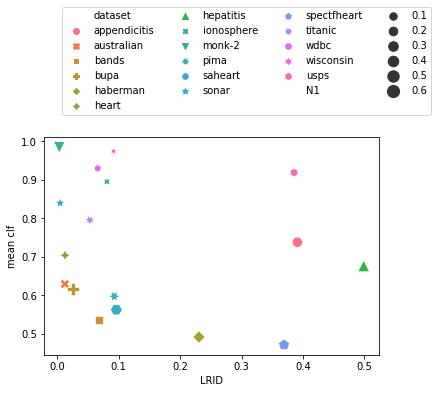

In [22]:
dataset_plot(master_hyperopt_df, 'mean clf', 'LRID', size_="N1")

# Can we use N1 or N3 to Scale the imbalance ratio 
In this experiment, we want to see, if we can see a tendency, that if the imbalance ratio increases, then the N1 or N3 might increase until a certain point, and start going down again. This experiment creates modified versions of the selection of datasets, both synthetics and real datasets are to be examined. This means, that we can both plot what happens for our existing datasets, when we alter the class imbalance ratio.



## Extract the datasets

In [3]:
from imblearn.under_sampling import RandomUnderSampler
from ds_pipe.datasets.dataset_loader import DatasetCollections
from src.utils import undersampler, load_synthetic_datasets, load_real_datasets
from ds_pipe.datasets.dataset_metadata import DatasetInformation
from src.measures import n_3, n_3_imb_mean, n_1_imb_mean
import pandas as pd
import numpy as np 

In [4]:
datasets = load_synthetic_datasets() + load_real_datasets()

In [4]:
#result_dict = {}
from time import time 
start_time = time()
from knn_experiment import optimized_experiment as knn_experiment
from mlp_experiment import optimized_experiment as mlp_experiment
from rf_experiment import optimized_experiment as rf_experiment 
from svm_experiment import optimized_experiment as svm_experiment 

def resampling_experiment(dataset_tuple, IR, max_evals=10): 
    dataset, dataset_name = dataset_tuple
    resampled_dataset = undersampler(dataset, IR=IR)
    knn_gmeans,knn_f1s,knn_recs = knn_experiment([(resampled_dataset, dataset_name)], max_evals=max_evals)
    svm_gmeans,svm_f1s,svm_recs = svm_experiment([(resampled_dataset, dataset_name)], max_evals=max_evals)
    mlp_gmeans,mlp_f1s,mlp_recs = mlp_experiment([(resampled_dataset, dataset_name)], max_evals=max_evals)
    rf_gmeans,rf_f1s,rf_recs = rf_experiment([(resampled_dataset, dataset_name)], max_evals=max_evals)
    mean_gmean = np.mean([np.mean(knn_gmeans),np.mean(svm_gmeans),np.mean(mlp_gmeans),np.mean(rf_gmeans)])
    mean_f1s = np.mean([np.mean(knn_f1s),np.mean(svm_f1s),np.mean(mlp_f1s),np.mean(rf_f1s)])
    mean_recs = np.mean([np.mean(knn_recs),np.mean(svm_recs),np.mean(mlp_recs),np.mean(rf_recs)])
    n3_result = n_3(resampled_dataset)
    n3_imb_result = n_3_imb_mean(resampled_dataset)
    n1_imb_result = n_1_imb_mean(resampled_dataset)
    row = {"dataset": dataset_name, "ir": IR, "n3":n3_result,
    "svm_gmean":np.mean(svm_gmeans),"svm_f1":np.mean(svm_f1s),"svm_rec":np.mean(svm_recs),
    "knn_gmean":np.mean(knn_gmeans),"knn_f1":np.mean(knn_f1s),"knn_rec":np.mean(knn_recs),
    "rf_gmean":np.mean(rf_gmeans),"rf_f1":np.mean(knn_f1s),"rf_rec":np.mean(rf_recs),
    "mlp_gmean":np.mean(mlp_gmeans),"mlp_f1":np.mean(mlp_f1s),"mlp_rec":np.mean(mlp_recs),
    "mean_gmean":mean_gmean,"mean_f1":mean_f1s,"mean_rec":mean_recs,
    "n_3_imb": n3_imb_result, "n_1_imb": n1_imb_result}
    return row


/home/jogoe12/git/class_imbalance_measure/venv/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [5]:
%%capture
from itertools import product
from multiprocessing import Pool
df = pd.DataFrame()
for dataset in datasets: 
    li = product([dataset],range(1,11),[10])
    with Pool(16) as pool: 
        result_rows = list(pool.starmap(resampling_experiment,li))
        for row in result_rows: 
            df = df.append(row, ignore_index=True)
        df.to_csv(f"./results/resampling/combined.csv", index=False)

## Analyzing the results

In [13]:
import pandas as pd 


In [14]:
df = pd.read_csv('./results/adapted_ir/combined_30_evals.csv')
df

,dataset,ir,n3,svm_gmean,svm_f1,svm_rec,knn_gmean,knn_f1,knn_rec,rf_gmean,rf_f1,rf_rec,mlp_gmean,mlp_f1,mlp_rec,mean_gmean,mean_f1,mean_rec,n_3_imb,n_1_imb
0,appendicitis,1,0.285714,0.800599,0.785714,0.720000,0.797024,0.797222,0.760000,0.760407,0.797222,0.755000,0.790936,0.799127,0.785000,0.787242,0.785823,0.755000,0.285714,0.452381
1,appendicitis,3,0.214286,0.777751,0.733333,0.630000,0.809493,0.757619,0.695000,0.780693,0.757619,0.665000,0.781414,0.714632,0.665000,0.787338,0.729868,0.663750,0.269841,0.349206
2,appendicitis,5,0.176471,0.726515,0.636190,0.566667,0.770742,0.676190,0.641667,0.803115,0.676190,0.691667,0.818202,0.713095,0.741667,0.779643,0.681667,0.660417,0.294118,0.347059
3,appendicitis,7,0.154639,0.346968,0.300000,0.250000,0.533169,0.440000,0.383333,0.633297,0.440000,0.483333,0.448256,0.373333,0.300000,0.490422,0.410000,0.354167,0.338725,0.499020
4,appendicitis,9,0.127660,0.282843,0.266667,0.200000,0.661594,0.531905,0.600000,0.669234,0.531905,0.600000,0.732305,0.611905,0.650000,0.586494,0.491786,0.512500,0.318954,0.398039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,usps,5,0.027083,0.834353,0.803824,0.704167,0.937678,0.918683,0.887500,0.799213,0.918683,0.643750,0.929796,0.894039,0.881250,0.875260,0.846032,0.779167,0.062917,0.094583
150,usps,7,0.026988,0.904818,0.882879,0.825042,0.921033,0.901737,0.854034,0.702629,0.901737,0.500252,0.908408,0.853832,0.842017,0.859222,0.822745,0.755336,0.085621,0.132792
151,usps,9,0.024756,0.790243,0.688299,0.643590,0.896643,0.862625,0.811966,0.684475,0.862625,0.473789,0.894669,0.824546,0.816097,0.816508,0.750756,0.686360,0.097318,0.150338
152,usps,11,0.020626,0.795049,0.764750,0.638528,0.894571,0.856344,0.807143,0.549580,0.856344,0.308225,0.896689,0.827871,0.817532,0.783972,0.727709,0.642857,0.094660,0.144278


In [15]:
df.loc[df['ir']==3]

,dataset,ir,n3,svm_gmean,svm_f1,svm_rec,knn_gmean,knn_f1,knn_rec,rf_gmean,rf_f1,rf_rec,mlp_gmean,mlp_f1,mlp_rec,mean_gmean,mean_f1,mean_rec,n_3_imb,n_1_imb
1,appendicitis,3,0.214286,0.777751,0.733333,0.630000,0.809493,0.757619,0.695000,0.780693,0.757619,0.665000,0.781414,0.714632,0.665000,0.787338,0.729868,0.663750,0.269841,0.349206
8,australian,3,0.295499,0.498977,0.409978,0.617538,0.618340,0.488640,0.434308,0.850666,0.488640,0.766769,0.222018,0.141564,0.086000,0.547500,0.458656,0.476154,0.397387,0.544682
15,bands,3,0.208469,0.566964,0.418982,0.558333,0.587647,0.454416,0.396667,0.548582,0.454416,0.318333,0.127227,0.086055,0.060000,0.457605,0.350274,0.333333,0.350791,0.533089
22,bupa,3,0.280899,0.508714,0.371202,0.589560,0.610702,0.497200,0.410989,0.619296,0.497200,0.418132,0.035857,0.020000,0.014286,0.443642,0.350684,0.358242,0.388507,0.540634
29,haberman,3,0.293333,0.548668,0.408991,0.620000,0.547306,0.384467,0.380000,0.504432,0.384467,0.306667,0.251749,0.167450,0.126667,0.463039,0.326113,0.358333,0.395556,0.566667
36,heart,3,0.230000,0.692751,0.773144,0.703333,0.697880,0.892936,0.933333,0.821781,0.892936,0.963333,0.447836,0.787853,0.833333,0.665062,0.847377,0.858333,0.333333,0.433333
43,ionosphere,3,0.116667,0.802942,0.938817,0.984444,0.757925,0.930236,0.988889,0.911549,0.930236,0.982222,0.851105,0.953139,0.991111,0.830880,0.947085,0.986667,0.220000,0.288889
50,mammo-mass,3,0.195079,0.815585,0.722339,0.750862,0.708144,0.600213,0.563793,0.772604,0.600213,0.676108,0.520090,0.436520,0.479433,0.704106,0.607261,0.617549,0.274557,0.435234
57,monk-2,3,0.134868,0.770697,0.897962,0.908019,0.874882,0.958620,0.989082,1.000000,0.958620,1.000000,0.860301,0.930599,0.929565,0.876470,0.946795,0.956667,0.109649,0.524123
64,pima,3,0.247376,0.551629,0.386446,0.514795,0.654546,0.514502,0.515152,0.685918,0.514502,0.518093,0.259794,0.200698,0.146970,0.537972,0.420340,0.423752,0.338479,0.479317


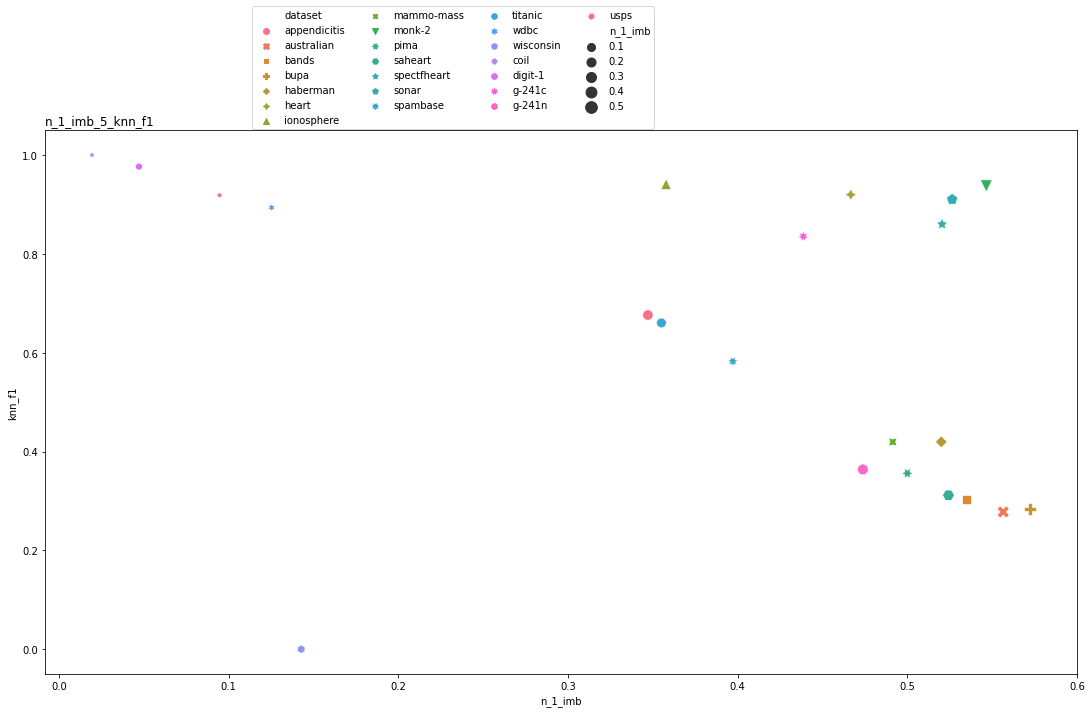

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.transforms import Bbox

def dataset_plot(df, quality_measure, complexity_measure, size_="N1"): 
    ax = sns.scatterplot(data=df, x=complexity_measure, y=quality_measure, hue="dataset", size=size_, style="dataset",sizes=(50,150))
    fig = plt.gcf()
    fig.set_size_inches(18.5,10)
    plt.legend(bbox_to_anchor=(0.2, 1), ncol=4, borderaxespad=0.1)

alg = "knn_f1"
measure = "n_1_imb"
IR = 5
title = f"{measure}_{IR}_{alg}"
dataset_plot(df.loc[df['ir']==IR], alg, measure, size_="n_1_imb")
plt.title(f"{title}",loc="left")
plt.savefig(f"./plots/dataset_plots/adapted_ir/{title}.pdf",bbox_inches="tight")

### Discussion
We observe many interesting things in this experiment where we are altering the imbalance ratio of the datasets in our lineup. Firstly N_1 and N_3 are incredible at predicting the performance of the kNN classifier, but it is also clear that these should be correlated, since N_1 and N_3 are also based on nearest neighbors. They are also great at predicting the performance of the random forrest classifier, and even predicting the performance of the support vector machine. 
*This lead me to the conclusion, that we it should indeed be possible to scale the IR using N1 or N3 or a combination of both*. For this experiment the number of trials in the parameter space was very very small only 10 samples per space. I've increased that to 30 samples, (which exhausts the kNN space), but only puts a dent in the MLP space. The MLP performance here is all over the place. 

# Hypothesis: Can we apply the N1 and N3 score to decide whether or not resampling works on a dataset
Maybe we can say if SMOTE oversampling could be helpful and improve classifier performance. What would be interesting to observe in an experiment here is, that for instance oversampling might work as long as the measure is below certain number, and from that point, SMOTE might be bad or similar. So what we should look at is plotting the measure, the performance of a classifier and the performance of the classifier after oversampling, or undersampling.


In [2]:
from imblearn.over_sampling import RandomOverSampler
from src.measures import n_1_imb_mean, n_3_imb_mean
from ds_pipe.datasets.dataset_loader import DatasetCollections
from ds_pipe.datasets.dataset_utils import generate_bunch_dataset
from knn_experiment import optimized_experiment as knn_experiment
from svm_experiment import optimized_experiment as svm_experiment
from rf_experiment import optimized_experiment as rf_experiment
from mlp_experiment import optimized_experiment as mlp_experiment
import numpy as np
from itertools import product
from multiprocessing import Pool
import pandas as pd


df_synthetic = pd.read_csv("results/hyperopt/combined_gmean.csv")
df_real = pd.read_csv("results/hyperopt/combined_gmean_real.csv")

Main experiment function

In [2]:
def oversampling_experiment(dataset_tuple, max_evals=10): 
    dataset, dataset_name = dataset_tuple
    knn_gmeans,knn_f1s,knn_recs = knn_experiment([(dataset, dataset_name)], max_evals=max_evals, resampler=RandomOverSampler)
    svm_gmeans,svm_f1s,svm_recs = svm_experiment([(dataset, dataset_name)], max_evals=max_evals, resampler=RandomOverSampler)
    mlp_gmeans,mlp_f1s,mlp_recs = mlp_experiment([(dataset, dataset_name)], max_evals=max_evals, resampler=RandomOverSampler)
    rf_gmeans,rf_f1s,rf_recs = rf_experiment([(dataset, dataset_name)], max_evals=max_evals, resampler=RandomOverSampler)


    mean_gmean = np.mean([np.mean(knn_gmeans),np.mean(svm_gmeans),np.mean(mlp_gmeans),np.mean(rf_gmeans)])
    mean_f1s = np.mean([np.mean(knn_f1s),np.mean(svm_f1s),np.mean(mlp_f1s),np.mean(rf_f1s)])
    mean_recs = np.mean([np.mean(knn_recs),np.mean(svm_recs),np.mean(mlp_recs),np.mean(rf_recs)])
    row = {"dataset": dataset_name,
    "svm_gmean":np.mean(svm_gmeans),"svm_f1":np.mean(svm_f1s),"svm_rec":np.mean(svm_recs),
    "knn_gmean":np.mean(knn_gmeans),"knn_f1":np.mean(knn_f1s),"knn_rec":np.mean(knn_recs),
    "rf_gmean":np.mean(rf_gmeans),"rf_f1":np.mean(knn_f1s),"rf_rec":np.mean(rf_recs),
    "mlp_gmean":np.mean(mlp_gmeans),"mlp_f1":np.mean(mlp_f1s),"mlp_rec":np.mean(mlp_recs),
    "mean_gmean":mean_gmean,"mean_f1":mean_f1s,"mean_rec":mean_recs}
    return row

In [3]:
df = pd.DataFrame()

In [4]:
dc = DatasetCollections()
max_evals = 5
#TODO do this with the synthetic datasets as well 
datasets = [dc.load_dataset(dataset_name) for dataset_name in df_real['dataset']]
for dataset in datasets: 
    li = product(datasets,[30])
    row = oversampling_experiment(dataset, max_evals)
    df = df.append(row, ignore_index=True)

100%|██████████| 5/5 [00:02<00:00,  1.68trial/s, best loss: 0.2403950838788126] 
appendicitis {'degree': 1, 'gamma': 2, 'kernel': 0}
100%|██████████| 5/5 [00:03<00:00,  1.30trial/s, best loss: 0.5741727424064645]
australian {'degree': 0, 'gamma': 8, 'kernel': 2}
100%|██████████| 5/5 [00:03<00:00,  1.51trial/s, best loss: 0.5218437682407755]
bands {'degree': 1, 'gamma': 3, 'kernel': 2}
100%|██████████| 5/5 [00:03<00:00,  1.59trial/s, best loss: 0.5001862094622604]
bupa {'degree': 3, 'gamma': 14, 'kernel': 2}
100%|██████████| 5/5 [00:03<00:00,  1.56trial/s, best loss: 0.38478142533836257]
haberman {'degree': 2, 'gamma': 2, 'kernel': 0}
100%|██████████| 5/5 [00:03<00:00,  1.61trial/s, best loss: 0.3841445700927085] 
heart {'degree': 2, 'gamma': 17, 'kernel': 2}
100%|██████████| 5/5 [00:03<00:00,  1.65trial/s, best loss: 0.35687477854987804]
hepatitis {'degree': 2, 'gamma': 0, 'kernel': 0}
100%|██████████| 5/5 [00:03<00:00,  1.58trial/s, best loss: 0.16734260241966226]
ionosphere {'degree'

In [5]:
df

,dataset,svm_gmean,svm_f1,svm_rec,knn_gmean,knn_f1,knn_rec,rf_gmean,rf_f1,rf_rec,mlp_gmean,mlp_f1,mlp_rec,mean_gmean,mean_f1,mean_rec
0,appendicitis,0.759605,0.568609,0.760000,0.773125,0.620139,0.715000,0.755895,0.620139,0.645000,0.674460,0.550180,0.585000,0.740771,0.596621,0.676250
1,australian,0.425827,0.531192,0.695108,0.653189,0.601060,0.551957,0.871459,0.601060,0.845241,0.025420,0.129656,0.203252,0.493974,0.529849,0.573889
2,bands,0.478156,0.414754,0.459259,0.564596,0.481506,0.525926,0.700099,0.481506,0.574074,0.000000,0.162000,0.300000,0.435713,0.423067,0.464815
3,bupa,0.499814,0.491316,0.593103,0.663044,0.615755,0.620690,0.703702,0.615755,0.631034,0.000000,0.177551,0.300000,0.466640,0.485118,0.536207
4,haberman,0.615219,0.468723,0.492647,0.646282,0.499395,0.598897,0.541034,0.499395,0.396324,0.360188,0.300107,0.388603,0.540680,0.411335,0.469118
5,heart,0.615855,0.620403,0.573333,0.659768,0.707820,0.713333,0.823216,0.707820,0.856667,0.072361,0.154286,0.196667,0.542800,0.582543,0.585000
6,hepatitis,0.643125,0.509524,0.533333,0.669751,0.403172,0.766667,0.796804,0.403172,0.733333,0.062017,0.150459,0.500000,0.542924,0.428408,0.633333
7,ionosphere,0.832657,0.901262,0.937778,0.805877,0.903773,0.977778,0.920611,0.903773,0.960000,0.894069,0.940598,0.975556,0.863303,0.923556,0.962778
8,monk-2,0.983282,0.982989,0.967150,0.982241,0.982019,0.964928,1.000000,0.982019,1.000000,0.694313,0.806889,0.851111,0.914959,0.942974,0.945797
9,pima,0.507144,0.423458,0.481516,0.720736,0.648089,0.766771,0.739754,0.648089,0.684731,0.010000,0.258933,0.500000,0.494409,0.499019,0.608255


In [4]:
from src.measures import n_1_imb_mean, n_3_imb_mean
from ds_pipe.datasets.dataset_loader import DatasetCollections
dc = DatasetCollections()
n_1_scores = []
n_3_scores = []

for dataset_name in df['dataset']: 
    dataset,_ = dc.load_dataset(dataset_name)
    n_1_scores.append(n_1_imb_mean(dataset))
    n_3_scores.append(n_3_imb_mean(dataset))


In [5]:
from src.measures import complexity_adjusted_imbalance_ratio
cair_scores = []
for dataset_name in df['dataset']: 
    dataset,_ = dc.load_dataset(dataset_name)
    cair_scores.append(complexity_adjusted_imbalance_ratio(dataset))

In [6]:
df = pd.read_csv("./results/oversampling_exp/real_datasets.csv")
aggregate_df = pd.DataFrame()
aggregate_df['dataset'] = df['dataset']
aggregate_df['knn-diff'] = df['knn_gmean'] - df_real['knn']
aggregate_df['knn-pdiff'] = (df['knn_gmean']/df_real['knn'])

aggregate_df['svm-diff'] = df['svm_gmean'] - df_real['svm']
aggregate_df['svm-pdiff'] = (df['svm_gmean']/df_real['svm'])

aggregate_df['mlp-diff'] = df['mlp_gmean'] - df_real['mlp']
aggregate_df['mlp-pdiff'] = (df['mlp_gmean']/df_real['mlp'])

aggregate_df['rf-diff'] = df['rf_gmean'] - df_real['rf']
aggregate_df['rf-pdiff'] = (df['rf_gmean']/df_real['rf'])
aggregate_df['n1'] = n_1_scores
aggregate_df['n3'] = n_3_scores
aggregate_df['cair'] = cair_scores

In [12]:
from src.measures import imbalance_ratio
irs = []
for dataset_name in df['dataset']: 
    dataset,_ = dc.load_dataset(dataset_name)
    irs.append(imbalance_ratio(dataset))


In [16]:
aggregate_df['IR'] = [round(ir,3) for ir in irs]
aggregate_df

,dataset,knn-diff,knn-pdiff,svm-diff,svm-pdiff,mlp-diff,mlp-pdiff,rf-diff,rf-pdiff,n1,n3,IR
0,appendicitis,0.160286,1.217192,0.056435,1.078818,-0.062621,0.915669,0.206777,1.274375,0.415406,0.284874,4.048
1,australian,0.009368,1.014526,0.052066,1.105046,-0.262582,0.473192,0.019313,1.022031,0.569896,0.400014,1.248
2,bands,-0.042033,0.934118,0.251767,1.460118,-0.170362,0.354299,0.168072,1.242465,0.541385,0.320773,1.704
3,bupa,0.013891,1.021226,0.011453,1.017628,-0.152826,0.639017,0.065259,1.088875,0.578190,0.388190,1.379
4,haberman,0.233945,1.404903,0.380771,1.689627,-0.301780,0.000000,0.297327,1.557931,0.575556,0.381728,2.778
5,heart,0.018708,1.027325,-0.055596,0.920989,-0.420064,0.285824,0.018447,1.022024,0.516667,0.353333,1.250
6,hepatitis,0.092438,1.130786,0.301542,1.436360,-0.508818,0.119113,0.244612,1.336140,0.520092,0.328932,5.154
7,ionosphere,0.027840,1.034159,-0.058815,0.937878,0.059689,1.066989,0.025959,1.027998,0.262540,0.176032,1.786
8,monk-2,-0.012191,0.987769,-0.193967,0.806033,-0.049045,0.947884,0.000000,1.000000,0.181115,0.135965,1.118
9,pima,0.117470,1.170741,0.187258,1.289596,-0.323850,0.000000,0.129101,1.176937,0.506164,0.353343,1.866


# Discussion 
In this experiment it does not look like we can pick up anything about, if it is beneficial to use ROS for a kNN classifier. Sometimes the measure will have a high score, but ROS does not improve the performance.

# Optimizing the TLCM

In [6]:
import pandas as pd 
from src.measures import complexity_adjusted_imbalance_ratio,imbalance_ratio,new_cair, tair, n_1_imb_mean, n_3_imb_mean
from ds_pipe.datasets.dataset_loader import DatasetCollections
dc = DatasetCollections()
import seaborn as sns
import matplotlib.pyplot as plt 
from src.utils import load_real_datasets, load_synthetic_datasets
from matplotlib.transforms import Bbox

/home/goettcke/PhD/class_imbalance_measure/venv/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/goettcke/PhD/class_imbalance_measure/venv/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


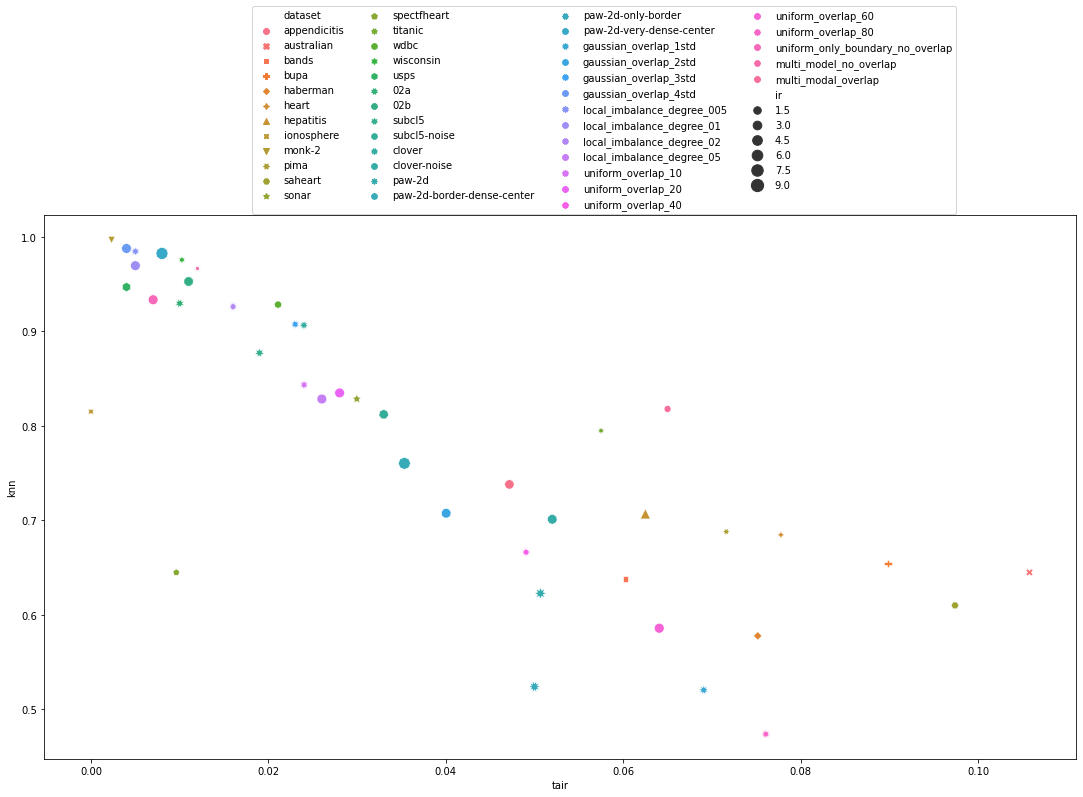

In [5]:
df_gmean = pd.read_csv("./results/hyperopt/combined_gmean.csv")
cair_scores = []
new_cair_scores = []
ir_scores = []
tair_scores = []
n_1_scores = []
n_3_scores = []

for dataset,dataset_name in load_real_datasets() + load_synthetic_datasets(): 
    cair_scores.append(complexity_adjusted_imbalance_ratio(dataset))
    new_cair_scores.append(new_cair(dataset))
    ir_scores.append(imbalance_ratio(dataset))
    tair_scores.append(tair(dataset))
    n_1_scores.append(n_1_imb_mean(dataset))
    n_3_scores.append(n_3_imb_mean(dataset))

df_gmean['new_cair'] = new_cair_scores
df_gmean['cair'] = cair_scores
df_gmean['ir'] = ir_scores
df_gmean['tair'] = tair_scores
df_gmean['n1'] = n_1_scores
df_gmean['n3'] = n_3_scores

def dataset_plot(df, quality_measure, complexity_measure, size_="N1"): 
    ax = sns.scatterplot(data=df, x=complexity_measure, y=quality_measure, hue="dataset", size=size_, style="dataset",sizes=(50,150))
    fig = plt.gcf()
    fig.set_size_inches(18.5,10)
    plt.legend(bbox_to_anchor=(0.2, 1), ncol=4, borderaxespad=0.1)

alg = "knn"
measure = "tair"
IR = 5
title = f"{measure}_{IR}_{alg}"
dataset_plot(df_gmean, alg, measure, size_="ir")
#plt.title(f"{title}",loc="left")
#plt.savefig(f"./plots/dataset_plots/adapted_ir/{title}.pdf",bbox_inches="tight")

# Performance in terms of recall and f1

In [15]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

/home/goettcke/PhD/class_imbalance_measure/venv/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/goettcke/PhD/class_imbalance_measure/venv/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
def dataset_plot(df, classifier_name, complexity_measure, size_="N1", style="llncs"): 
    if style == "llncs": 
        ax = sns.scatterplot(data=df, x=complexity_measure, y=classifier_name, hue="dataset", size=size_, style="dataset",sizes=(50,150))
        fig = plt.gcf()
        fig.set_size_inches(18.5,10)
        plt.xlim(0,1)
        plt.ylim(0,1)       
        plt.legend(bbox_to_anchor=(0.2, 1), ncol=4, borderaxespad=0.1)
    elif style == "sdm": 
        ax = sns.scatterplot(data=df, x=complexity_measure, y=classifier_name, hue="dataset", size=size_, style="dataset",sizes=(50,150))
        fig = plt.gcf()
        fig.set_size_inches(6,6)
        plt.xlim(0,1)
        plt.ylim(0,1)       
        plt.legend(bbox_to_anchor=(0.97, 2.25), ncol=2, borderaxespad=0.1)
        plt.savefig(f"./plots/dataset_plots/siam_full_plot_{complexity_measure}.pdf",bbox_inches="tight")



In [10]:
%%capture
recall_df = pd.read_csv("./results/hyperopt/combined_recall_mac_rec.csv")
f_one_df = pd.read_csv("./results/hyperopt/combined_f1_mac_rec.csv")
prec_df = pd.read_csv("./results/hyperopt/combined_prec_mac_rec.csv")
gmean_df = pd.read_csv("./results/hyperopt/combined_gmean_mac_rec.csv")

#recall_df = recall_df.sort_values(by="dataset")
measures = pd.read_csv("./results/measures.csv")
#measures = measures.sort_values(by="dataset")
measures.set_index("dataset")
f_one_df.set_index("dataset")
recall_df.set_index("dataset")
prec_df.set_index("dataset")

In [9]:
measures

,dataset,degIR,degOver,tlcm,n1,n3,LRID,ImbDeg,ImbEnt,IR,tlcm_2,tlcm_2_mean
0,02a,0.6667,0.1233,0.0100,0.1260,0.0710,0.4852,0.6667,0.6500,5.0000,0.125000,0.125000
1,02b,0.6660,0.1340,0.0110,0.1378,0.0749,0.4841,0.6660,0.6508,4.9880,0.125749,0.125749
2,subcl5,0.6660,0.1830,0.0190,0.2061,0.1210,0.4841,0.6660,0.6508,4.9880,0.209581,0.209581
3,subcl5-noise,0.6665,0.2367,0.0330,0.2368,0.1796,0.4849,0.6665,0.6502,4.9970,0.295352,0.295352
4,clover,0.6660,0.2090,0.0240,0.2187,0.1336,0.4841,0.6660,0.6508,4.9880,0.227545,0.227545
5,clover-noise,0.6667,0.3740,0.0520,0.3824,0.2960,0.4852,0.6667,0.6500,5.0000,0.504000,0.504000
6,paw-2d,0.8000,0.2213,0.0507,0.4274,0.3667,0.7361,0.8000,0.4690,9.0000,0.653333,0.653333
7,paw-2d-border-dense-center,0.8000,0.1907,0.0353,0.3578,0.2878,0.7361,0.8000,0.4690,9.0000,0.513333,0.513333
8,paw-2d-only-border,0.8000,0.2393,0.0500,0.5267,0.4344,0.7361,0.8000,0.4690,9.0000,0.780000,0.780000
9,paw-2d-very-dense-center,0.8000,0.0867,0.0080,0.1267,0.0663,0.7361,0.8000,0.4690,9.0000,0.113333,0.113333


In [11]:
gmean_df['n1'] = measures['n1']
gmean_df['n3'] = measures['n3']
gmean_df['tlcm'] = measures['tlcm']
gmean_df['tlcm_2'] = measures['tlcm_2']
gmean_df['tlcm_2_mean'] = measures['tlcm_2_mean']
gmean_df['degOver'] = measures['degOver']
gmean_df['IR'] = measures['IR']
gmean_df['degIR'] = measures['degIR']

gmean_df['mean_clf']=(gmean_df['knn']+gmean_df['svm']+gmean_df["rf"]+gmean_df['mlp']+gmean_df['tree']+gmean_df['nb'])/6

In [12]:
recall_df['n1'] = measures['n1']
recall_df['n3'] = measures['n3']
recall_df['tlcm'] = measures['tlcm']
recall_df['tlcm_2'] = measures['tlcm_2']
recall_df['tlcm_2_mean'] = measures['tlcm_2_mean']
recall_df['degOver'] = measures['degOver']
recall_df['IR'] = measures['IR']
recall_df['degIR'] = measures['degIR']

recall_df['mean_clf']=(recall_df['knn']+recall_df['svm']+recall_df["rf"]+recall_df['mlp']+recall_df['tree']+recall_df['nb'])/6

In [13]:
prec_df['n1'] = measures['n1']
prec_df['n3'] = measures['n3']
prec_df['tlcm'] = measures['tlcm']
prec_df['tlcm_2'] = measures['tlcm_2']
prec_df['tlcm_2_mean'] = measures['tlcm_2_mean']
prec_df['degOver'] = measures['degOver']
prec_df['IR'] = measures['IR']
prec_df['degIR'] = measures['degIR']

prec_df['mean_clf']=(prec_df['knn']+prec_df['svm']+prec_df["rf"]+prec_df['mlp']+prec_df['mlp']+prec_df['tree']+prec_df['nb'])/6


# Making the little plot to illustrate IR's bad correlation 

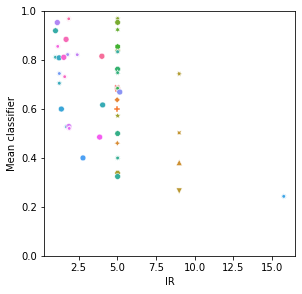

In [8]:
ax = sns.scatterplot(data=recall_df, x="IR", y="mean_clf", hue="dataset", style="dataset",sizes=(50,150))
fig = plt.gcf()
fig.set_size_inches(4.5,4.5)
plt.ylim(0,1)       
plt.ylabel("Mean classifier")
plt.legend().remove()
plt.savefig(f"./plots/dataset_plots/siam_full_plot_IR.pdf",bbox_inches="tight")

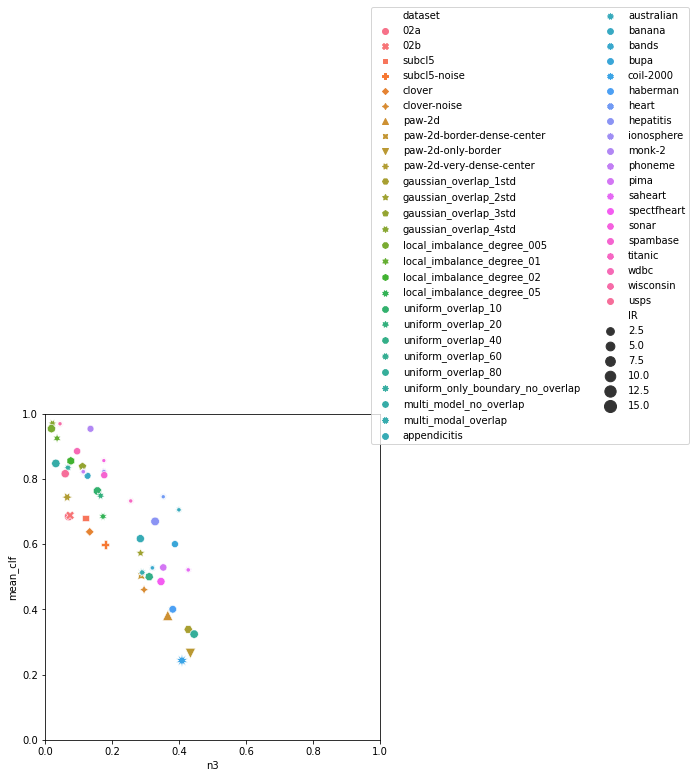

In [8]:
dataset_plot(recall_df,"mean_clf","n3",size_="IR",style="sdm")

/home/goettcke/PhD/class_imbalance_measure/venv/lib/python3.9/site-packages/ipywidgets/widgets/widget.py:443: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super().__init__(**kwargs)


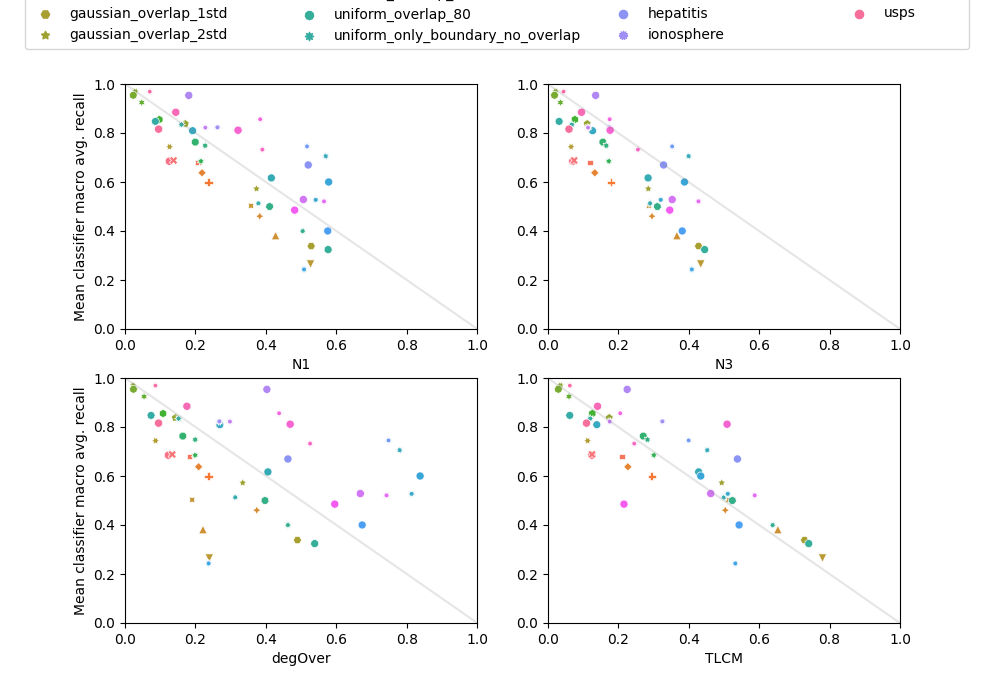

In [16]:
fig, axs = plt.subplots(2,2)
classifier_name = "mean_clf"
size_= None#"size_param"  #Otherwise set to IR
df = recall_df
#df["size_param"] = [15]*len(recall_df)

g1 = sns.scatterplot(data=df, x="n1", y=classifier_name, hue="dataset", size=size_, style="dataset", ax=axs[0,0])
g2 = sns.scatterplot(data=df, x="n3", y=classifier_name, hue="dataset", size=size_, style="dataset", ax=axs[0,1])
g2 = sns.scatterplot(data=df, x="degOver", y=classifier_name, hue="dataset", size=size_, style="dataset", ax=axs[1,0])
g3 = sns.scatterplot(data=df, x="tlcm_2", y=classifier_name, hue="dataset", size=size_, style="dataset", ax=axs[1,1])

axs[0,0].set_ylabel("Mean classifier macro avg. recall")
axs[0,1].set_ylabel("")
axs[0,0].set_xlabel("N1")
axs[0,1].set_xlabel("N3")
axs[1,0].set_ylabel("Mean classifier macro avg. recall")
axs[1,0].set_xlabel("degOver")
axs[1,1].set_xlabel("TLCM")
axs[1,1].set_ylabel("")

#lines, labels = fig.axes[-1].get_legend_handles_labels()
#fig.legend(lines, labels, loc = 'upper center')

for ax_row in axs: 
    for ax in ax_row:
        ax.legend([],[]).remove()
        ax.set_ylim(0,1)
        ax.set_xlim(0,1)
        ax.plot(np.linspace(0,1,num=10),np.linspace(1,0,num=10), color="grey",alpha=0.2)

fig = plt.gcf()
fig.set_size_inches(10,7)
plt.legend(bbox_to_anchor=(1.2,3.4), ncol=4, borderaxespad=0.1)
plt.savefig(f"./plots/dataset_plots/siam_plot_mac_rec.pdf",bbox_inches="tight")

In [19]:
from scipy.stats import pearsonr
pearsonr(gmean_df['IR'],gmean_df['mean_clf'])

(-0.2931340206322634, 0.04553507641503665)

In [20]:
def correlation_dataframe(df):

    correlations = [
                pearsonr(df['IR'], df['mean_clf']),
                pearsonr(df['n1'],df['mean_clf']),
                pearsonr(df['n3'],df['mean_clf']),
                pearsonr(df['degIR'], df['mean_clf']),
                pearsonr(df['degOver'],df['mean_clf']),
                pearsonr(df['tlcm_2'], df['mean_clf'])
                ]

    correlations_df = pd.DataFrame(
                    {
                        "measure":["IR","N1","N3","degIR","degOver","TLCM"],
                        "Cor. coef": [cor for cor,p in correlations],
                        "p-value": [p for cor,p in correlations]
                    }
    )
    return correlations_df


In [21]:
gmean_correlations = correlation_dataframe(gmean_df)
mac_rec_correlations = correlation_dataframe(recall_df)
prec_correlations = correlation_dataframe(prec_df)

In [22]:
print(mac_rec_correlations.to_latex(index=False))

\begin{tabular}{lrr}
\toprule
measure &  Cor. coef &      p-value \\
\midrule
     IR &  -0.462157 & 1.074037e-03 \\
     N1 &  -0.775559 & 1.538981e-10 \\
     N3 &  -0.845687 & 7.408172e-14 \\
  degIR &  -0.365908 & 1.142632e-02 \\
degOver &  -0.426962 & 2.762359e-03 \\
   TLCM &  -0.850069 & 4.066730e-14 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_151841/1151227795.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(mac_rec_correlations.to_latex(index=False))


In [23]:
from src.utils import load_synthetic_datasets, load_real_datasets
datasets = load_synthetic_datasets() + load_real_datasets()

In [24]:
number_of_attributes = [len(dataset.data[0]) for dataset,dataset_name in datasets]
cardinality = [len(dataset.target) for dataset,dataset_name in datasets]

In [25]:

df = recall_df
df['IR'] = round(recall_df['IR'],2)
df['mean_clf'] = round(recall_df['mean_clf'],3)
df['attr.'] = number_of_attributes
df['samples']  = cardinality
print(recall_df[['dataset','mean_clf',"IR","attr.","samples"]].to_latex(index=False))

\begin{tabular}{lrrrr}
\toprule
                         dataset &  mean\_clf &    IR &  attr. &  samples \\
\midrule
                             02a &     0.685 &  5.00 &      2 &     1200 \\
                             02b &     0.688 &  4.99 &      2 &     1000 \\
                          subcl5 &     0.680 &  4.99 &      2 &     1000 \\
                    subcl5-noise &     0.599 &  5.00 &      2 &     4000 \\
                          clover &     0.638 &  4.99 &      2 &     1000 \\
                    clover-noise &     0.460 &  5.00 &      2 &     1500 \\
                          paw-2d &     0.381 &  9.00 &      2 &     1500 \\
      paw-2d-border-dense-center &     0.503 &  9.00 &      2 &     1500 \\
              paw-2d-only-border &     0.265 &  9.00 &      2 &     1500 \\
        paw-2d-very-dense-center &     0.744 &  9.00 &      2 &     1500 \\
           gaussian\_overlap\_1std &     0.338 &  5.02 &      2 &      999 \\
           gaussian\_overlap\_2std &     0.5

/tmp/ipykernel_151841/1358622119.py:6: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(recall_df[['dataset','mean_clf',"IR","attr.","samples"]].to_latex(index=False))


## Following function shows that the average distance to the diagonal line is not smaller for TLCM on gmean, but super close. It shows that TLCM is more interpretable in terms of mac rec and prec

In [54]:
from sklearn.preprocessing import MinMaxScaler
from numpy import std,array
scaler = MinMaxScaler()

def std_dev_to_diagonal(df, cm): 
    return std([abs(1-(qmi+cpi)) for qmi,cpi in zip(df[cm],df["mean_clf"])])

def distance_to_diagonal(df, cm):  
    if cm != "IR": 
        return round(sum([abs(1-(cmi+cpi)) for cmi,cpi in zip(df[cm],df["mean_clf"])])/len(df),3)
    else:
        scaler.fit(array(df['IR']).reshape(-1,1))
        return round(sum([abs(1-(scaler.transform(array(cmi).reshape(-1,1))[0][0]+cpi)) for cmi,cpi in zip(df[cm],df["mean_clf"])])/len(df),3)


In [55]:
from turtle import distance
import pandas as pd 
df = pd.DataFrame()

measures = ["IR","n1","n3","degIR","degOver","tlcm_2"]
df['measures'] = measures
df['rec'] = [distance_to_diagonal(recall_df, measure) for measure in measures]
df['gmean'] = [distance_to_diagonal(gmean_df, measure) for measure in measures]
df['prec'] = [distance_to_diagonal(prec_df, measure) for measure in measures]

print(df.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
measures &   rec &  gmean &  prec \\
\midrule
      IR & 0.187 &  0.178 & 0.199 \\
      n1 & 0.104 &  0.074 & 0.133 \\
      n3 & 0.129 &  0.086 & 0.137 \\
   degIR & 0.256 &  0.305 & 0.296 \\
 degOver & 0.178 &  0.138 & 0.199 \\
  tlcm\_2 & 0.081 &  0.099 & 0.132 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_151841/3254033077.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


Let's examine the regression line instead

In [29]:
df = pd.DataFrame()

measures = ["IR","n1","n3","degIR","degOver","tlcm_2"]
df['measures'] = measures
df['rec'] = [std_dev_to_diagonal(recall_df, measure) for measure in measures]
df['gmean'] = [std_dev_to_diagonal(gmean_df, measure) for measure in measures]
df['prec'] = [std_dev_to_diagonal(prec_df, measure) for measure in measures]

print(df.to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
measures &      rec &    gmean &     prec \\
\midrule
      IR & 2.634512 & 2.677510 & 2.624055 \\
      n1 & 0.073893 & 0.063304 & 0.088670 \\
      n3 & 0.090870 & 0.064036 & 0.098449 \\
   degIR & 0.176560 & 0.174225 & 0.214415 \\
 degOver & 0.142402 & 0.131189 & 0.153856 \\
  tlcm\_2 & 0.076906 & 0.069893 & 0.091917 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_151841/2081086521.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))


In [71]:
gmean_df

,dataset,svm,knn,mlp,rf,tree,nb,n1,n3,tlcm,tlcm_2,tlcm_2_mean,degOver,IR,degIR,mean_clf
0,02a,0.91677,0.92652,0.15228,0.91818,0.90677,0.528,0.1260,0.0710,0.0100,0.125000,0.125000,0.1233,5.0000,0.6667,0.724753
1,02b,0.93261,0.95313,0.09887,0.93493,0.93158,0.439,0.1378,0.0749,0.0110,0.125749,0.125749,0.1340,4.9880,0.6660,0.715020
2,subcl5,0.56153,0.87068,0.12146,0.97646,0.98154,0.577,0.2061,0.1210,0.0190,0.209581,0.209581,0.1830,4.9880,0.6660,0.681445
3,subcl5-noise,0.82082,0.81127,0.07886,0.88358,0.86098,0.563,0.2368,0.1796,0.0330,0.295352,0.295352,0.2367,4.9970,0.6665,0.669752
4,clover,0.51256,0.91159,0.60897,0.87538,0.85646,0.459,0.2187,0.1336,0.0240,0.227545,0.227545,0.2090,4.9880,0.6660,0.703993
5,clover-noise,0.46320,0.71061,0.29412,0.69969,0.70438,0.493,0.3824,0.2960,0.0520,0.504000,0.504000,0.3740,5.0000,0.6667,0.560833
6,paw-2d,0.61289,0.62043,0.29645,0.61553,0.67401,0.485,0.4274,0.3667,0.0507,0.653333,0.653333,0.2213,9.0000,0.8000,0.550718
7,paw-2d-border-dense-center,0.76116,0.75824,0.43106,0.70736,0.75919,0.482,0.3578,0.2878,0.0353,0.513333,0.513333,0.1907,9.0000,0.8000,0.649835
8,paw-2d-only-border,0.22197,0.51064,0.18611,0.48292,0.61200,0.489,0.5267,0.4344,0.0500,0.780000,0.780000,0.2393,9.0000,0.8000,0.417107
9,paw-2d-very-dense-center,0.96851,0.98288,0.58875,0.91930,0.91304,0.449,0.1267,0.0663,0.0080,0.113333,0.113333,0.0867,9.0000,0.8000,0.803580


In [70]:
gmean_df['n3'].to_numpy().reshape(-1,1)

array([[0.071 ],
       [0.0749],
       [0.121 ],
       [0.1796],
       [0.1336],
       [0.296 ],
       [0.3667],
       [0.2878],
       [0.4344],
       [0.0663],
       [0.4281],
       [0.2854],
       [0.112 ],
       [0.0223],
       [0.0193],
       [0.0361],
       [0.0771],
       [0.1734],
       [0.1566],
       [0.1662],
       [0.3113],
       [0.3799],
       [0.4455],
       [0.0686],
       [0.042 ],
       [0.213 ],
       [0.2849],
       [0.4   ],
       [0.1272],
       [0.3208],
       [0.3882],
       [0.4091],
       [0.3817],
       [0.3533],
       [0.3289],
       [0.176 ],
       [0.136 ],
       [0.1144],
       [0.3533],
       [0.4279],
       [0.3465],
       [0.1758],
       [0.1771],
       [0.2561],
       [0.096 ],
       [0.0449],
       [0.0604]])

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
measure = 'n3'
df = recall_df
X = recall_df[measure].to_numpy().reshape(-1,1)
y = recall_df['mean_clf'].to_numpy()
model.fit(X,y)
print(f"coef: {model.coef_}, intercept:{model.intercept_} r2:{model.score(recall_df[measure].to_numpy().reshape(-1,1),gmean_df['mean_clf'])}")


coef: [-1.23387681], intercept:0.943427387605952 r2:0.6495072576679779


(0.0, 1.0)

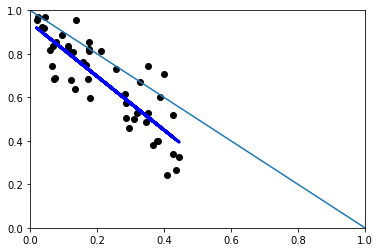

In [112]:
import matplotlib.pyplot as plt 
import numpy as np 
y_pred = model.predict(X)
plt.scatter(X,y,color="black")
plt.plot(X,y_pred,color="blue",linewidth=3)
plt.xlim(0,1)
plt.ylim(0,1)

# Here we computed a couple of runtimes, and tair is the fastest

In [1]:
from src.utils import load_real_datasets, load_synthetic_datasets
from src.measures import n_1_imb_mean, n_3_imb_mean

In [2]:
for dataset, dataset_name in load_real_datasets() + load_synthetic_datasets(): 
    x = n_1_imb_mean(dataset)

NameError: name 'n_1_imb_mean' is not defined

In [18]:
for dataset, dataset_name in load_real_datasets() + load_synthetic_datasets(): 
    x = n_3_imb_mean(dataset)

In [ ]:
for dataset, dataset_name in load_real_datasets() + load_synthetic_datasets(): 
    x = tair(dataset)

# Memory consumption and runtime over an artificial dataset

In [15]:
from ds_pipe.datasets.dataset_generator import DatasetGenerator
from ds_pipe.datasets.dataset_utils import generate_bunch_dataset


dg = DatasetGenerator(n_samples=10**7)
dg.generate_all_centers()
dataset = generate_bunch_dataset(dg.X_res,dg.y_res)

In [16]:
tair(dataset)

0.0036194000000000504

In [18]:
n_3_imb_mean(dataset)

0.0205321

# Extracting recall results for the paper 

In [67]:
recall_df_real = pd.read_csv("./results/hyperopt/combined_recall_real.csv")
recall_df_synth = pd.read_csv("./results/hyperopt/combined_recall_synth.csv")
measures = pd.read_csv("./results/tair/tair_48_datasets.csv")

measures.set_index("dataset")
recall_df_real.set_index("dataset")

recall_df_real['n1'] = measures['n1']
recall_df_real['n3'] = measures['n3']
recall_df_real['tair'] = measures['tair']
recall_df_real['cair'] = measures['cair']

In [54]:
recall_df

,dataset,knn,svm,rf,mlp,n1,n3,tair,cair
0,02a,0.98200,0.99650,0.98000,0.96250,0.126000,0.071000,0.010000,12.490410
1,02b,0.98439,0.98621,0.98321,0.95808,0.137782,0.074879,0.011000,12.648571
2,subcl5,0.96877,0.99340,0.99880,0.96032,0.206073,0.120997,0.019000,11.975992
3,subcl5-noise,0.99550,0.99685,0.98845,0.99159,0.236765,0.179629,0.033000,11.789346
4,clover,0.97061,0.98140,0.96158,0.94294,0.218656,0.133580,0.024000,12.691755
5,clover-noise,0.97320,0.97200,0.94520,0.98440,0.382400,0.296000,0.052000,12.366813
6,paw-2d,0.96704,0.97815,0.94370,0.99074,0.427407,0.366667,0.050667,22.534709
7,paw-2d-border-dense-center,0.97148,0.97741,0.96148,0.97704,0.357778,0.287778,0.035333,22.622679
8,paw-2d-only-border,0.94074,0.95704,0.92963,0.99037,0.526667,0.434444,0.050000,22.534391
9,paw-2d-very-dense-center,0.97815,0.98778,0.98333,0.97407,0.126667,0.066296,0.008000,22.739087


# Computing the TLCM_2 

In [188]:
from src.measures import tlcm_2,n_1_imb_mean,n_3_imb_mean,degIR,degOver,imbalance_ratio,tlcm_2_mean
from ds_pipe.datasets.dataset_metadata import DatasetInformation
from src.utils import load_real_datasets, load_synthetic_datasets
from ds_pipe.datasets.dataset_utils import generate_bunch_dataset
from sklearn.neighbors import NearestNeighbors
datasets = load_synthetic_datasets()[-2:]

for dataset, dataset_name in datasets: 
    di = DatasetInformation(dataset)
    print(f"{dataset_name}: {round(degIR(dataset),4)},{round(degOver(dataset),4)},{round(tlcm_2(dataset),4)},{round(n_1_imb_mean(dataset),4)},{round(n_3_imb_mean(dataset),4)},{round(di.lrid_score,4)},{round(di.imbalance_degree,4)},{round(di.normalized_imb_ent,4)},{round(di.ir,4)},{round(tlcm_2(dataset),4)},{round(tlcm_2_mean(dataset),4)}")

#for dataset,dataset_name in datasets: 
    #print(f"{dataset_name}: {tlcm_2(dataset)}")

multi_model_no_overlap: 0.68,0.074,0.0625,0.0862,0.0324,0.507,0.68,0.6343,5.25,0.0625,0.0024
multi_modal_overlap: 0.68,0.313,0.5,0.3787,0.2905,0.507,0.68,0.6343,5.25,0.5,0.081
